This notebook tests the functionality to create an architecture from a JSON file that was created by saving a cedar architecture to disk. Most of the modules also used in the spatial reasoning architecture were included in the test architecture to have an informative example. 

In [1]:
import sys
sys.path.append('../cedar_utils/')
from read_json import load_from_json
from parse_cedar_objects import parse_cedar_params, make_connection
import nengo
import numpy as np
import matplotlib.pyplot as plt
from cedar_modules import AbsSigmoid

In [2]:
objects, connections = load_from_json('../JSON/test_architecture.json')

In [3]:
model = nengo.Network()

with model:
    nengo_objects = {}
    for ob_key in objects:
        print(ob_key)
        name, instance = parse_cedar_params(objects[ob_key])
        instance.make_node()
        nengo_objects[name] = instance

Flip
Gauss Input 2
Projection
Projection 2
Spatial Template
Group 1.Component Multiply
Group 1.Neural Field
Group 1.Static Gain
Group 2.Gauss Input
Group 2.Neural Field 2


In [4]:
nengo_objects

{'Flip': <cedar_modules.Flip at 0x7fd8a103c6d8>,
 'Gauss Input 2': <cedar_modules.GaussInput at 0x7fd873448128>,
 'Projection': <cedar_modules.Projection at 0x7fd871fc6cc0>,
 'Projection 2': <cedar_modules.Projection at 0x7fd8a103c208>,
 'Spatial Template': <cedar_modules.SpatialTemplate at 0x7fd8a103c048>,
 'Group 1.Component Multiply': <cedar_modules.ComponentMultiply at 0x7fd8a101af28>,
 'Group 1.Neural Field': <cedar_modules.NeuralField at 0x7fd8a101afd0>,
 'Group 1.Static Gain': <cedar_modules.StaticGain at 0x7fd872026d68>,
 'Group 2.Gauss Input': <cedar_modules.GaussInput at 0x7fd872026e80>,
 'Group 2.Neural Field 2': <cedar_modules.NeuralField at 0x7fd8a103c518>}

In [5]:
with model:
    for connection in connections:
        print(connection[0][1], connection[1][1])
        make_connection(connection[0][1], connection[1][1], nengo_objects)
    
    probes = {}
    for key in nengo_objects:
        probes[key] = nengo.Probe(nengo_objects[key].node)

Group 1.Static Gain.output Flip.input
Group 2.Neural Field 2.sigmoided activation Projection.input
Group 2.Neural Field 2.sigmoided activation Projection 2.input
Gauss Input 2.Gauss input Group 1.Component Multiply.operands
Spatial Template.spatial pattern Group 1.Component Multiply.operands
Spatial Template.spatial pattern Group 1.Static Gain.input
Group 1.Neural Field.sigmoided activation Group 2.Neural Field 2.input
Group 1.Component Multiply.product Group 1.Neural Field.input
Group 1.Static Gain.output Group 1.Neural Field.input
Group 2.Gauss Input.Gauss input Group 2.Neural Field 2.input


In [6]:
sim = nengo.Simulator(model)
with sim:
    sim.run(0.5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

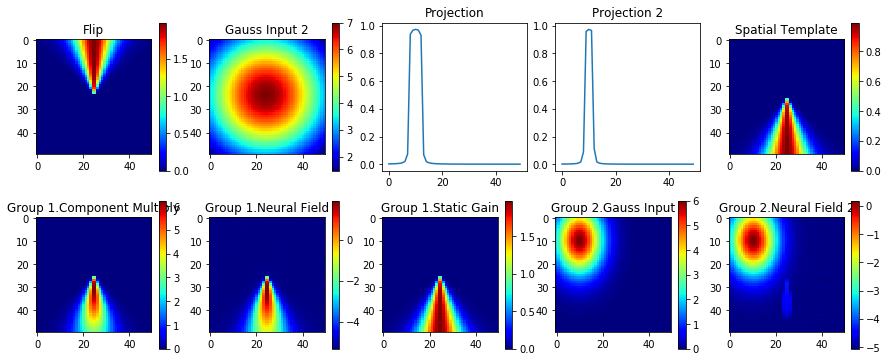

In [7]:
time_point = 200
plt.figure(figsize=(15,6))
for i, key in enumerate(probes):
    plt.subplot(2,5, i+1)
    probe_data = sim.data[probes[key]]
    if probe_data.shape[1] == 2500:
        plt.title(key)
        plt.imshow(probe_data[time_point,:].reshape(50,50), cmap='jet')
        plt.colorbar()
    else:
        plt.title(key)
        plt.plot(probe_data[time_point,:])
        
plt.show()
        

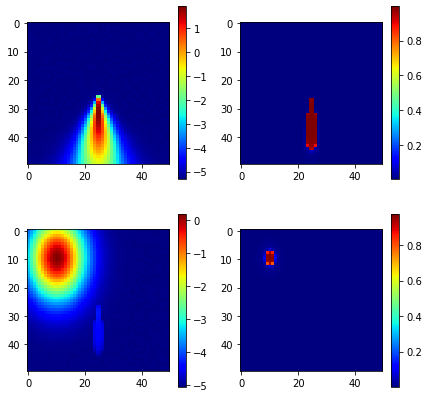

In [8]:
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
plt.imshow(sim.data[probes['Group 1.Neural Field']][time_point].reshape(50,50),
          cmap='jet')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(AbsSigmoid()(sim.data[probes['Group 1.Neural Field']][time_point]).reshape(50,50),
          cmap='jet')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(sim.data[probes['Group 2.Neural Field 2']][time_point].reshape(50,50),
          cmap='jet')
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(AbsSigmoid()(sim.data[probes['Group 2.Neural Field 2']][time_point]).reshape(50,50),
          cmap='jet')
plt.colorbar()

plt.show()